---

![](https://ci3.googleusercontent.com/meips/ADKq_NalPsTE2pvOYWNLuTx5FQEiqMR2IICqwbE0yd07Lo5DBqNSujrNfI0xeljnYJEChVIFRqOWdClXUnsfUcUCm1Yrdz0t8BSxBTJ5h_V81xXqZVaqBPFHbfeSCOfVVm-Ti6Ip97bEaRmY7VQ4uEa--AnbpHKzgP0LNNc69HJnzQT1YigtFjsIRkNyXNXscnsPuWMxfVHTVSUshI1Tqjimq5Glw3mN0JUf0G3dtb0LUw=s0-d-e1-ft#https://empresas.alura.com.br/hs-fs/hubfs/488ef98e-4d3a-4c98-9ad4-70c297d9511a.png?width=536&upscale=true&name=488ef98e-4d3a-4c98-9ad4-70c297d9511a.pngraw=true)
   

Por **Luiz Henrique Leite dos Santos**

# #7DaysOfCode - 2: Data Visualization & Storytelling 

Investigar os  dados e gerar visualizações para identificar padrões ou estatísticas.
   
---

## Importando Bibliotecas

In [88]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('CEAPS_dados_2019_2022.csv', sep=';', index_col=[0], parse_dates=[5])

In [5]:
df.head()

,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,04/01/2019,Despesa com pagamento de energia elétrica do e...,66.02
2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,04/01/2019,Despesa com pagamento de energia elétrica do e...,139.98
3,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,07/01/2019,Despesa com pagamento de aluguel de imóvel par...,6000.00
4,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,25/12/2018,Despesa com pagamento de telefonia para o escr...,316.39
5,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,04/02/2019,Despesa com pagamento de energia elétrica para...,99.45


In [29]:
# Convertendo a coluna 'Data' para o tipo datetime
df['DATA'] = pd.to_datetime(df['DATA'], format='%d/%m/%Y', errors='coerce')

# Verificando o tipo de dados após a conversão
print(df.dtypes)

SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO           float64
dtype: object


In [30]:
df.head()

,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,2019-01-04,Despesa com pagamento de energia elétrica do e...,66.02
2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,2019-01-04,Despesa com pagamento de energia elétrica do e...,139.98
3,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,2019-01-07,Despesa com pagamento de aluguel de imóvel par...,6000.00
4,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,2018-12-25,Despesa com pagamento de telefonia para o escr...,316.39
5,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ENERGISA,2019-02-04,Despesa com pagamento de energia elétrica para...,99.45


## Criando Visualizações com os dados

### Senador que mais declararam suas despesas

In [25]:
# Calcular o total de despesas declaradas por cada Senador
total_por_senador = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().reset_index()

# Encontrar os 10 Senadores que mais declararam despesas
top_10_senadores = total_por_senador.nlargest(10, 'VALOR_REEMBOLSADO')

# Criar o gráfico de barras
fig = px.bar(top_10_senadores, x='SENADOR', y='VALOR_REEMBOLSADO',
             labels={'SENADOR': 'Senador', 'VALOR_REEMBOLSADO': 'Total de Despesas Declaradas'},
             title='<b>Top 10 Senadores que mais declararam despesas (2019 - 2022)</b>',
             color='SENADOR', color_discrete_sequence=px.colors.qualitative.Set1)

# Personalizar o layout do gráfico
fig.update_layout(xaxis_title='Senador',
                  yaxis_title='Total de Despesas Declaradas',
                  legend_title='Senador',
                  legend=dict(orientation='h', yanchor='top', y=1.3, xanchor='right', x = 1 ),
            
                  margin=dict(l=100, r=100, t=200, b=100),  # Ajustar as margens
                  font=dict(size=12),
                  width=1000,  # Ajustar a largura do gráfico
                  height=600,  # Ajustar a altura do gráfico
                  title_x=0.5,  # Centralizar o título
                  title_y=0.98,
                  yaxis=dict(type='log'))  # Modificar a escala do eixo y para logarítmica  # Ajustar a posição vertical do título
                

# Exibir o gráfico
fig.show()

Com base na visualição criada com os dados, é possível se observar que o senador que mais declarou suas despesas, no período de 2019 - 2022, foi o senador Telmário Mota com 1.95M declarados, seguido do senador Rogério Carvalho com 1.92M declarados.

In [36]:
df_2022.head()

,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
36111,ALESSANDRO VIEIRA,"Contratação de consultorias, assessorias, pesq...",23.412.247/0001-10,AMAZON AWS SERVICOS BRASIL LTDA,2022-01-03,"Contratação de consultorias, assessorias, pesq...",116.25
36184,ANGELO CORONEL,Divulgação da atividade parlamentar,07.053.147/0001-99,Velip - Tradeal Serviços em Tecnologia da Info...,2022-02-14,Distribuição de conteúdo - divulgação da ativi...,10000.00
36205,ANGELO CORONEL,"Locomoção, hospedagem, alimentação, combustíve...",13.331.488/0001-81,J. Pedro de Brito - Carros,2022-03-05,Locação de veículo de apoio à atividade parlam...,4750.00
36215,ANGELO CORONEL,"Locomoção, hospedagem, alimentação, combustíve...",13.331.488/0001-81,J. Pedro de Brito - Carros,2022-03-05,Locação de veículo de apoio à atividade parlam...,4750.00
36225,ANGELO CORONEL,"Contratação de consultorias, assessorias, pesq...",30.727.829/0001-51,BUNKER BRAIN AUDIOVISUAL EIRELI,2022-03-15,Assessoria de comunicação - planejamento estra...,48000.00


In [39]:
df_2022 = df[df['DATA'].dt.year == 2022]

### Gastos totais anuais

In [71]:
# Calcular o total de gastos por ano
total_gastos_anuais = df.groupby(df['DATA'].dt.year).VALOR_REEMBOLSADO.sum().reset_index()

# Filtrar para incluir apenas os anos a partir de 2019
total_gastos_anuais = total_gastos_anuais[total_gastos_anuais['DATA'] >= 2019]

# Criar um gráfico de barras para representar o total de gastos anuais dos senadores
fig = px.bar(total_gastos_anuais, x='DATA', y='VALOR_REEMBOLSADO', 
             title='Total de Gastos Anuais dos Senadores (2019-2022)',
             labels={'VALOR_REEMBOLSADO': 'Total de Gastos', 'DATA': 'Ano'})

# Definir os limites do eixo x para começar a partir de 2019 e mostrar apenas valores inteiros
fig.update_xaxes(range=[2019, 2022], tickmode='linear', dtick=1)

# Alterar as cores das barras
fig.update_traces(marker_color=['#A3BE8C', '#88C0D0', '#88C0D0', '#D08770'])

# Adicionar uma legenda identificando o ano de 2022 como "Ano Eleitoral"
fig.update_layout(legend_title='Legenda', legend=dict(x=0.01, y=0.99),
                  annotations=[dict(x=2022, y=total_gastos_anuais.loc[total_gastos_anuais['DATA'] == 2022, 'VALOR_REEMBOLSADO'].values[0],
                                    text="Ano Eleitoral", showarrow=False, yshift= 10, xshift = -70)])


# Adicionar legenda personalizada
fig.add_annotation(x=2019, y=total_gastos_anuais.loc[total_gastos_anuais['DATA'] == 2019, 'VALOR_REEMBOLSADO'].values[0],
                   text="Ano Normal", showarrow=False, yshift=10, xshift = 60)
fig.add_annotation(x=2020, y=total_gastos_anuais.loc[total_gastos_anuais['DATA'] == 2020, 'VALOR_REEMBOLSADO'].values[0],
                   text="Ano Pandemia", showarrow=False, yshift=10)
fig.add_annotation(x=2021, y=total_gastos_anuais.loc[total_gastos_anuais['DATA'] == 2021, 'VALOR_REEMBOLSADO'].values[0],
                   text="Ano Pandemia", showarrow=False, yshift=10)

# Adicionar rótulos aos eixos
fig.update_xaxes(title_text='Ano')
fig.update_yaxes(title_text='Total de Gastos')

# Exibir o gráfico
fig.show()

Com base no gráfico se observa um leve aumento no valor reembolsado pelos senadores no ano eleitoral de 2022.

## Tipo de Despesa anual 

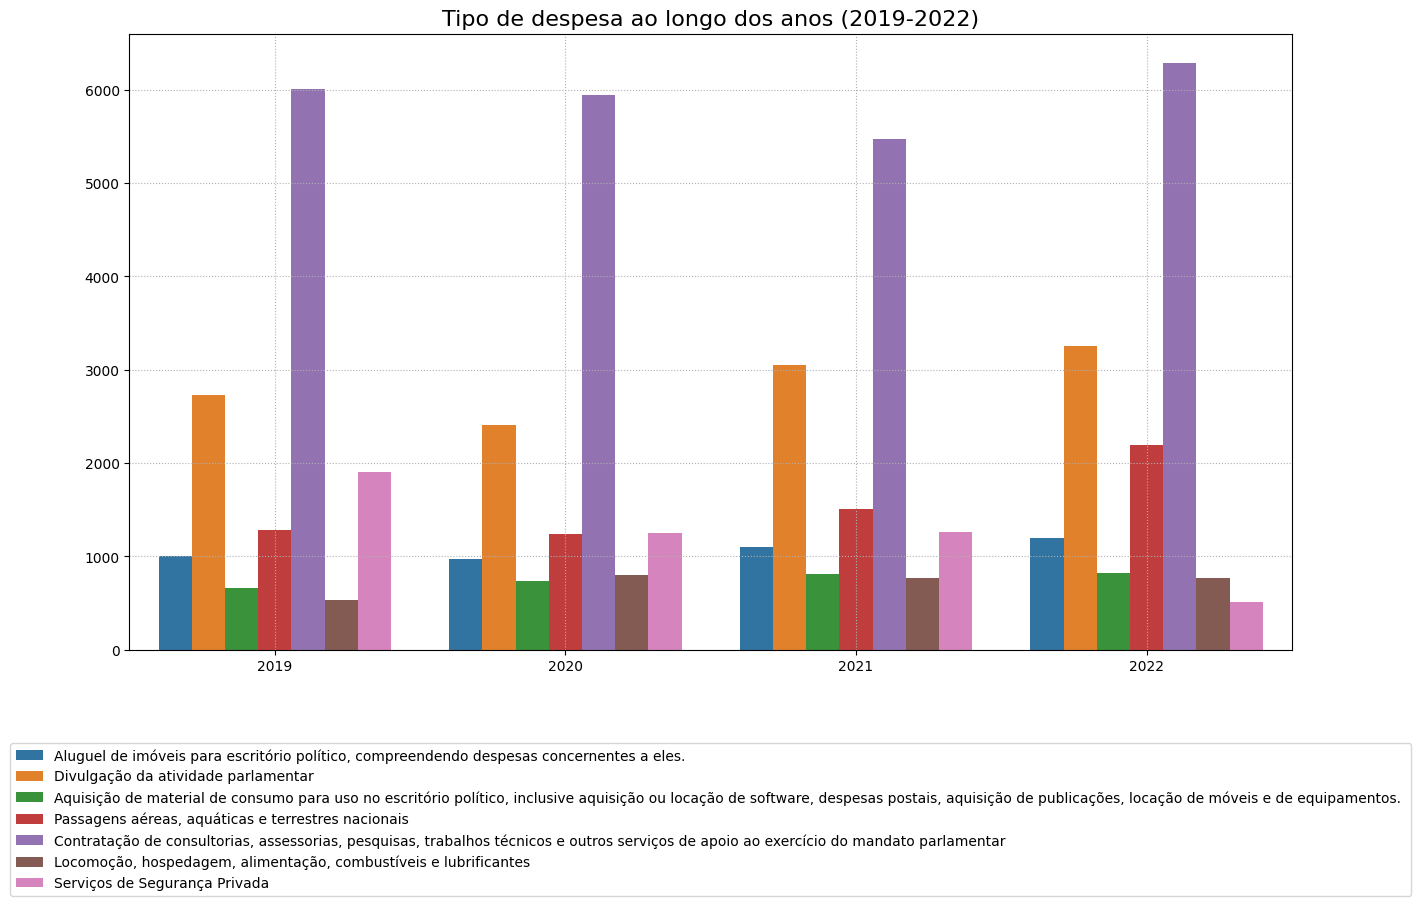

In [92]:
# Filtrar os dados para incluir apenas os anos de 2019 a 2022
dados_filtrados = df[df['DATA'].dt.year.between(2019, 2022)]

plt.figure(figsize=(15, 8))
ax = sns.barplot(x=dados_filtrados['DATA'].dt.year, y="VALOR_REEMBOLSADO", hue="TIPO_DESPESA", data=dados_filtrados, errorbar=None)
ax.set(xlabel=None, ylabel=None)
ax.set_title('Tipo de despesa ao longo dos anos (2019-2022)', fontsize=16)
plt.grid(ls=':')
plt.legend(bbox_to_anchor=(0.5, -0.4), loc='lower center', borderaxespad=0)
plt.show()

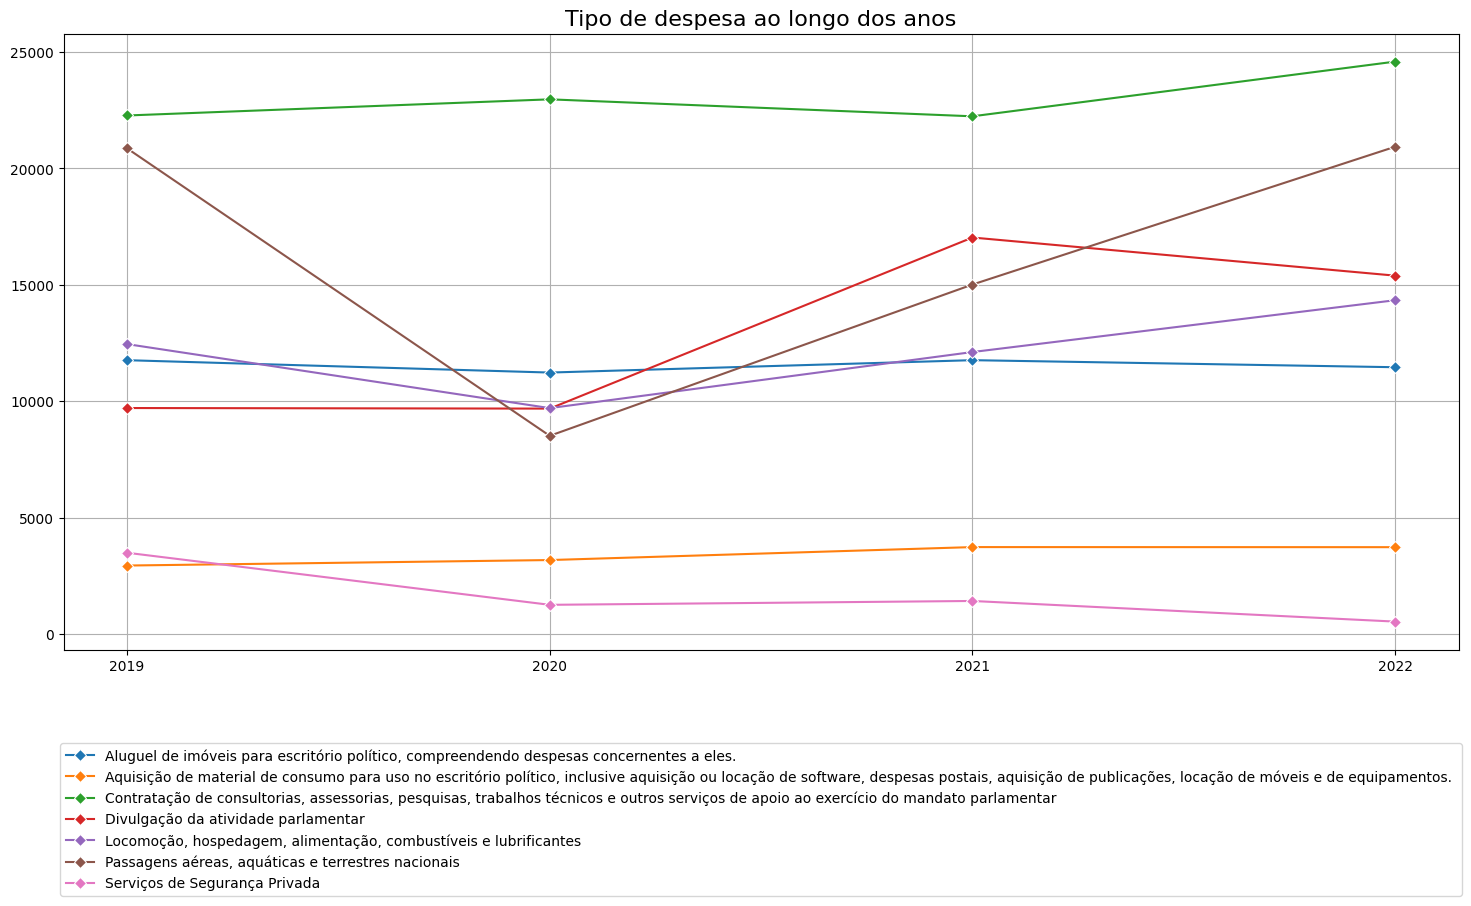

In [91]:
# Filtrar os dados para incluir apenas os anos de 2019 a 2022
dados_filtrados = df[df['DATA'].dt.year.between(2019, 2022)]

# Agrupar os dados por tipo de despesa e data, somando os valores reembolsados
ds = dados_filtrados.groupby(['TIPO_DESPESA', 'DATA'], as_index=False)['VALOR_REEMBOLSADO'].sum()

plt.figure(figsize=(18, 8))
ax = sns.lineplot(data=ds, x=ds['DATA'].dt.year, y='VALOR_REEMBOLSADO', hue='TIPO_DESPESA', marker='D', errorbar=None)
ax.legend(bbox_to_anchor=(0.5, -0.4), loc='lower center', borderaxespad=0)
ax.ticklabel_format(axis='y', style='plain')
x = range(2019, 2023)
ax.set_xticks(x)
ax.grid(True)
ax.set(xlabel=None, ylabel=None)
ax.set_title("Tipo de despesa ao longo dos anos", fontsize=16)
plt.show()

In [95]:
# Filtrar os dados usando query para incluir apenas o tipo de despesa desejado
contratacao = df.query("TIPO_DESPESA == 'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar'")

# Filtrar os dados para o intervalo de anos de 2019 a 2022
contratacao_2019_2022 = contratacao[contratacao['DATA'].dt.year.between(2019, 2022)]

# Agrupar os dados por ano e somar os valores reembolsados
total_por_ano = contratacao_2019_2022.groupby(contratacao_2019_2022['DATA'].dt.year)['VALOR_REEMBOLSADO'].sum()

# Exibir o total de Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar por ano
print("Total de Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar por ano:")
print(total_por_ano)

Total de Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar por ano:
DATA
2019    5836064.81
2020    5994995.79
2021    6004883.74
2022    6319761.18
Name: VALOR_REEMBOLSADO, dtype: float64


In [97]:
total_por_ano.mean()

6038926.38

A partir dos dois modelos de gráfico é visto que a despesa de maior custo ao longo dos anos foi a de Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar, tendo uma média de R$ 6038926.38 anuais.